<a href="https://colab.research.google.com/github/Yves54/ABC-Community-Portal/blob/main/Stage_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from prophet import Prophet

In [13]:
df = pd.read_csv('/content/drive/MyDrive/Stage-E/Time_series_analysis_and_forecast_DATASET.csv')
df.head () 

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [19]:
df.FullDate = pd.to_datetime(df.FullDate)

In [21]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [22]:
df.set_index('FullDate',inplace=True)

In [24]:
df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 MB


In [5]:
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [27]:
df.shape 

(92016, 4)

In [26]:
df.isnull().sum()

Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [58]:
df_hourly = df.resample('H').mean()
df_daily = df.resample('D').mean()
df_weekly = df.resample('W').mean()
df_monthly = df.resample('M').mean()

h_shape = df_hourly.shape
d_shape = df_daily.shape
w_shape = df_weekly.shape
m_shape = df_monthly.shape

print(f'{h_shape = }')
print(f'{d_shape = }') 
print(f'{w_shape = }')
print(f'{m_shape = }')  

h_shape = (92016, 4)
d_shape = (3834, 4)
w_shape = (548, 4)
m_shape = (126, 4)


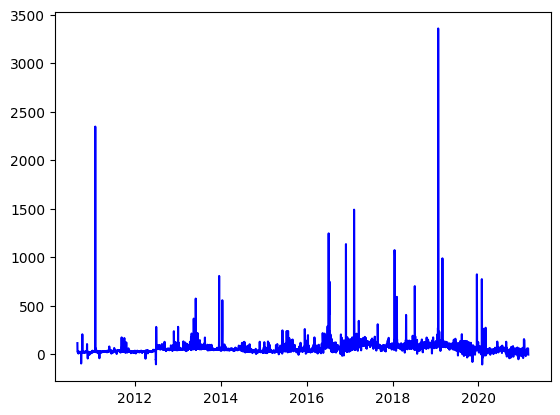

In [60]:
# plotting the daily resampled data

plt.plot(df_daily.ElecPrice, 'b')
plt.show()

In [61]:
df_fcst = df.resample('D').sum()
df_fcst = df_fcst.reset_index()
df_fcst.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [62]:
adf_sys = adfuller(df_fcst.SysLoad)

In [64]:
p_value_sys = adf_sys[1]
print(f'{p_value_sys = :.6f}')

p_value_sys = 0.004254


In [65]:
adf_gas = adfuller(df_fcst.GasPrice)

In [66]:
p_value_gas = adf_gas[1]
print(f'{p_value_gas = :.6f}')

p_value_gas = 0.045027


In [38]:
#Critical values for GasPrice
print('Critical Values:')
for k, v in adf_gas[4].items():
    print(f'{k} : {v}')

Critical Values:
1% : -3.4320693157877544
5% : -2.8622996992165364
10% : -2.5671743978048323


In [67]:
adf_elec = adfuller(df_fcst.ElecPrice)

In [68]:
#Critical values for ElecPrice
print('Critical Values:')
for k, v in adf_elec[4].items():
    print(f'{k} : {v}')

Critical Values:
1% : -3.432066157296446
5% : -2.8622983040036005
10% : -2.5671736550459663


In [69]:
fcst_data = df_fcst[['FullDate','ElecPrice']]
rename_dict = {
    'FullDate':'ds',
    'ElecPrice':'y'
}
fcst_data = fcst_data.rename(columns=rename_dict)

fcst_data.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [70]:
# splitting data into train and test set
# Using first 2757 datapoints as the train set and the rest as test set

fcst_train = fcst_data.iloc[:2757]
fcst_test = fcst_data.iloc[2757:]

fcst_train.shape,fcst_test.shape

((2757, 2), (1077, 2))

In [71]:
model = Prophet()
model = model.fit(fcst_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe0pdosz4/fn31oyaz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe0pdosz4/l4p_r7wk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79218', 'data', 'file=/tmp/tmpe0pdosz4/fn31oyaz.json', 'init=/tmp/tmpe0pdosz4/l4p_r7wk.json', 'output', 'file=/tmp/tmpe0pdosz4/prophet_modelasqryvc_/prophet_model-20230404190702.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:07:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:07:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [72]:
forecast = model.predict(fcst_test)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2687.807715,158.945468,4921.910792,2687.807715,2687.807715,-155.281939,-155.281939,-155.281939,9.737752,9.737752,9.737752,-165.019691,-165.019691,-165.019691,0.0,0.0,0.0,2532.525776
1,2018-03-21,2688.609367,455.909801,5021.881634,2688.609367,2688.609367,-2.749381,-2.749381,-2.749381,159.365206,159.365206,159.365206,-162.114587,-162.114587,-162.114587,0.0,0.0,0.0,2685.859986
2,2018-03-22,2689.411018,211.829078,5256.737175,2689.411018,2689.411018,95.475991,95.475991,95.475991,257.121966,257.121966,257.121966,-161.645975,-161.645975,-161.645975,0.0,0.0,0.0,2784.887009
3,2018-03-23,2690.212670,330.537801,5072.096500,2690.212670,2690.212670,-113.171619,-113.171619,-113.171619,50.276706,50.276706,50.276706,-163.448325,-163.448325,-163.448325,0.0,0.0,0.0,2577.041051
4,2018-03-24,2691.014321,-287.510355,4714.450212,2691.014321,2691.014321,-438.734727,-438.734727,-438.734727,-271.455065,-271.455065,-271.455065,-167.279662,-167.279662,-167.279662,0.0,0.0,0.0,2252.279594


In [76]:
#rmse
def rmse(actual,predicted):
    return np.sqrt(mean_squared_error(actual,predicted))

# mape
def mape(actual,predicted):
    return np.mean(np.abs((np.array(actual) - np.array(predicted)) / actual)) * 100

In [77]:
value = fcst_test.y
pred = forecast.yhat

rmse = rmse(value,pred)
print(f'{rmse = :.2f}')

rmse = 3211.82


In [75]:
mape = mape(value,pred)
print(f'{mape = :.2f}')

mape = 546.46


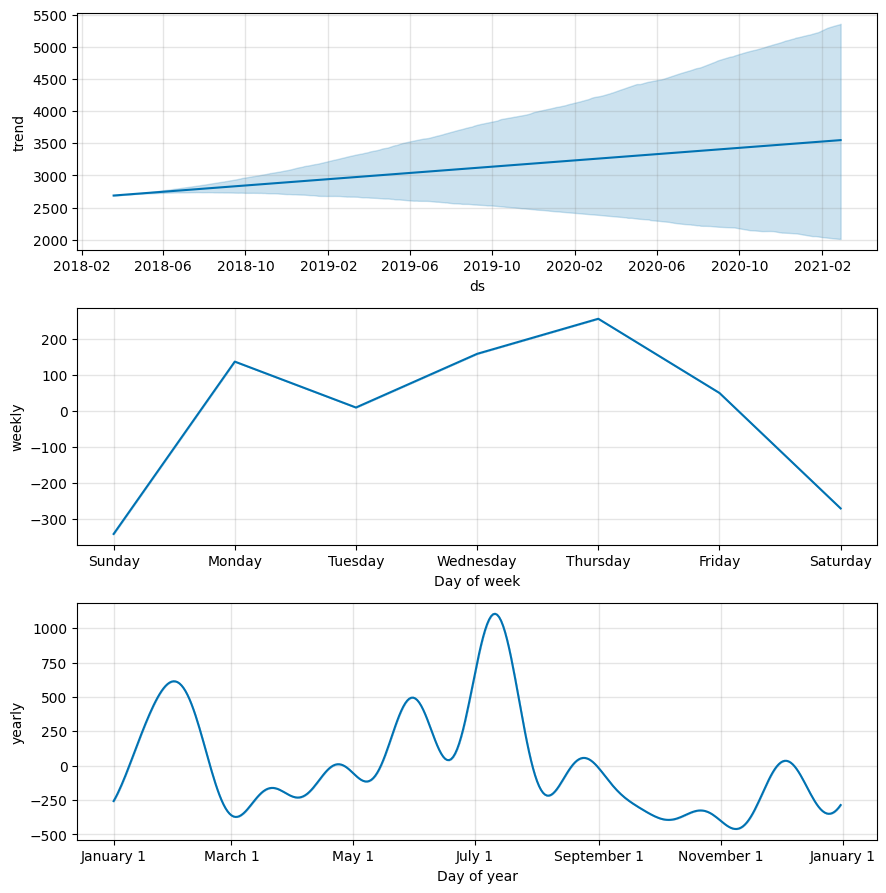

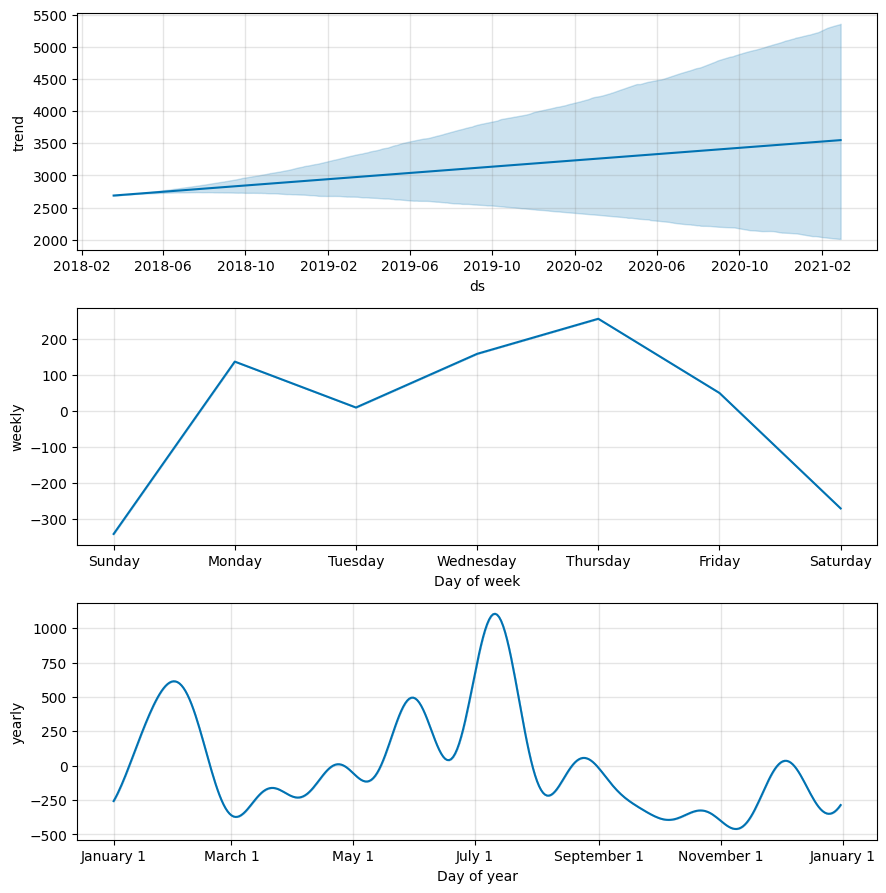

In [78]:
model.plot_components(forecast)

In [79]:
fcst_data.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [80]:
fcst_data["add1"] = df_fcst['SysLoad']
fcst_data["add2"] = df_fcst['Tmax']
fcst_data["add3"] = df_fcst['GasPrice']

In [81]:
fcst_data.head()

,ds,y,add1,add2,add3
0,2010-09-01,2751.700,41565.380,379.2,88.56
1,2010-09-02,570.810,38898.990,369.6,88.56
2,2010-09-03,504.975,41665.760,439.2,106.80
3,2010-09-04,502.275,35638.085,328.8,81.36
4,2010-09-05,500.555,35611.410,357.6,106.80


In [82]:
# splitting data into train and test set
# Using first 2757 datapoints as the train set and the rest as test set

fcst_train = fcst_data.iloc[:2757]
fcst_test = fcst_data.iloc[2757:]

fcst_train.shape,fcst_test.shape

((2757, 5), (1077, 5))

In [83]:
model2 = Prophet()

# Adding other independent variables as regressors
model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')

model2 = model2.fit(fcst_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe0pdosz4/djqdwp6c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe0pdosz4/omzsvhjl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58730', 'data', 'file=/tmp/tmpe0pdosz4/djqdwp6c.json', 'init=/tmp/tmpe0pdosz4/omzsvhjl.json', 'output', 'file=/tmp/tmpe0pdosz4/prophet_modelkxu4i0uu/prophet_model-20230404191108.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:11:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:11:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [84]:
forecast2 = model2.predict(fcst_test)
forecast2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1868.766952,-245.724484,4258.311737,1868.766952,1868.766952,-856.432627,-856.432627,-856.432627,0.235437,...,-84.486668,-84.486668,-84.486668,-39.239438,-39.239438,-39.239438,0.0,0.0,0.0,1988.271381
1,2018-03-21,1869.459198,-160.260078,4216.076913,1869.459198,1869.459198,-1026.456513,-1026.456513,-1026.456513,0.232644,...,42.522333,42.522333,42.522333,-29.944537,-29.944537,-29.944537,0.0,0.0,0.0,1979.670349
2,2018-03-22,1870.151445,706.322598,5167.945037,1870.151445,1870.151445,-214.972629,-214.972629,-214.972629,0.219109,...,145.630770,145.630770,145.630770,-24.905253,-24.905253,-24.905253,0.0,0.0,0.0,2899.980665
3,2018-03-23,1870.843692,247.413978,4664.713123,1870.843692,1870.843692,-274.914740,-274.914740,-274.914740,0.211160,...,-44.303208,-44.303208,-44.303208,-23.980248,-23.980248,-23.980248,0.0,0.0,0.0,2584.190044
4,2018-03-24,1871.535938,-671.909777,3637.177560,1871.535938,1871.535938,-1076.504930,-1076.504930,-1076.504930,0.209226,...,-117.549683,-117.549683,-117.549683,-26.918797,-26.918797,-26.918797,0.0,0.0,0.0,1437.185558


In [85]:
mape = mape(value,pred)
print(f'{mape = :.2f}')

mape = 546.46


In [87]:
fcst_data.head()

,ds,y,add1,add2,add3
0,2010-09-01,2751.700,41565.380,379.2,88.56
1,2010-09-02,570.810,38898.990,369.6,88.56
2,2010-09-03,504.975,41665.760,439.2,106.80
3,2010-09-04,502.275,35638.085,328.8,81.36
4,2010-09-05,500.555,35611.410,357.6,106.80


In [89]:
new_fcst = fcst_data.drop(columns='add2')
new_fcst.head()

,ds,y,add1,add3
0,2010-09-01,2751.700,41565.380,88.56
1,2010-09-02,570.810,38898.990,88.56
2,2010-09-03,504.975,41665.760,106.80
3,2010-09-04,502.275,35638.085,81.36
4,2010-09-05,500.555,35611.410,106.80


In [90]:
new_train = new_fcst.iloc[:2757]
new_test = new_fcst.iloc[2757:]

new_train.shape,new_test.shape

((2757, 4), (1077, 4))

In [91]:
model3 = Prophet()
model3 = model3.fit(new_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe0pdosz4/9vvdu7se.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe0pdosz4/hdmmh_3x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6284', 'data', 'file=/tmp/tmpe0pdosz4/9vvdu7se.json', 'init=/tmp/tmpe0pdosz4/hdmmh_3x.json', 'output', 'file=/tmp/tmpe0pdosz4/prophet_model8xmmggm2/prophet_model-20230404192540.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:25:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:25:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [92]:
forecast3 = model3.predict(new_test)
forecast3.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2687.807715,95.227650,4987.941372,2687.807715,2687.807715,-155.281939,-155.281939,-155.281939,9.737752,9.737752,9.737752,-165.019691,-165.019691,-165.019691,0.0,0.0,0.0,2532.525776
1,2018-03-21,2688.609367,272.718089,4946.544487,2688.609367,2688.609367,-2.749381,-2.749381,-2.749381,159.365206,159.365206,159.365206,-162.114587,-162.114587,-162.114587,0.0,0.0,0.0,2685.859986
2,2018-03-22,2689.411018,243.296335,5173.681650,2689.411018,2689.411018,95.475991,95.475991,95.475991,257.121966,257.121966,257.121966,-161.645975,-161.645975,-161.645975,0.0,0.0,0.0,2784.887009
3,2018-03-23,2690.212670,251.492525,5123.431922,2690.212670,2690.212670,-113.171619,-113.171619,-113.171619,50.276706,50.276706,50.276706,-163.448325,-163.448325,-163.448325,0.0,0.0,0.0,2577.041051
4,2018-03-24,2691.014321,-74.632107,4543.251905,2691.014321,2691.014321,-438.734727,-438.734727,-438.734727,-271.455065,-271.455065,-271.455065,-167.279662,-167.279662,-167.279662,0.0,0.0,0.0,2252.279594


In [93]:
value = new_test.y
pred = forecast3.yhat

In [94]:
mape = mape(value,pred)
print(f'{mape = :.2f}')

TypeError: ignored